# 🧠 Garbage Classification

## 📅 Week 1 Submission: Dataset Import and Preparation

This project focuses on classifying garbage images into categories such as organic, recyclable, and hazardous using a Convolutional Neural Network (CNN). In Week 1, we aim to import the dataset into Google Colab, organize it properly, and validate that image files are loaded correctly.

### 🔧 Tools & Libraries Used:
- Google Colab
- Python
- TensorFlow/Keras
- OpenCV
- Matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

dataset_path = '/content/drive/MyDrive/TrashType_Image_Dataset'  # replace with actual path
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    print(f'{folder}: {len(os.listdir(folder_path))} images')

plastic: 482 images
paper: 604 images
metal: 410 images
glass: 511 images
cardboard: 403 images
trash: 137 images


# 🖼️ Sample Image Preview

To verify that our dataset was uploaded correctly, we display a few random images from the dataset along with their categories.

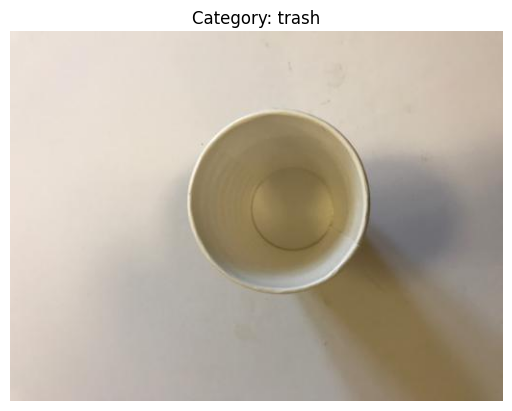

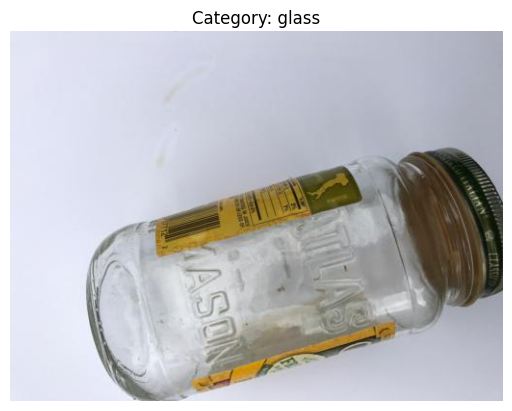

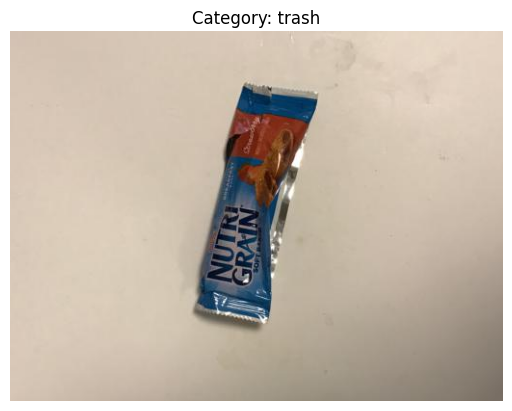

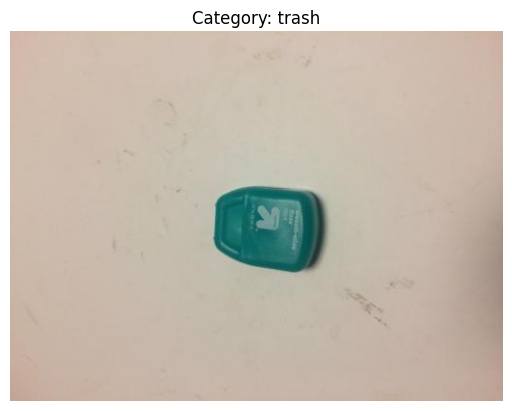

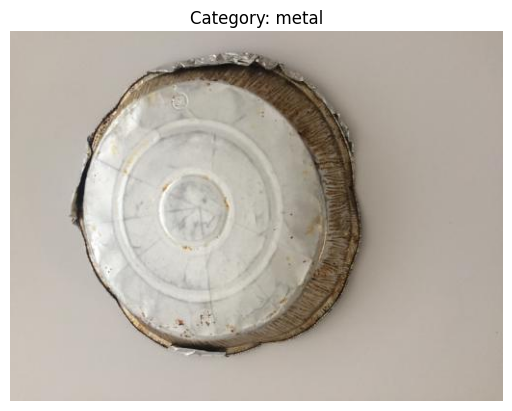

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

categories = os.listdir(dataset_path)

for _ in range(5):
    category = random.choice(categories)
    path = os.path.join(dataset_path, category)
    image_name = random.choice(os.listdir(path))
    image = cv2.imread(os.path.join(path, image_name))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.title(f'Category: {category}')
    plt.axis('off')
    plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

dataset_path = '/content/drive/MyDrive/TrashType_Image_Dataset'  # replace with actual path
image_size = (150, 150)  # You can adjust this as needed
batch_size = 32


train_generator = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

val_generator = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    seed=42,
    validation_split=0.2,
    subset='validation'
)
class_names = train_generator.class_names
print("Detected classes:", class_names)

Found 2547 files belonging to 6 classes.
Using 2038 files for training.
Found 2547 files belonging to 6 classes.
Using 509 files for validation.
Detected classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [ ]:
import os
import shutil
import random

# Original dataset directory with class folders
source_dir = '/content/drive/MyDrive/TrashType_Image_Dataset'
output_dir = '/content/drive/MyDrive/TrashType_split'

# Split ratio
split_ratio = 0.8

# Create output directories
for split in ['training', 'validation']:
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):
            target_dir = os.path.join(output_dir, split, class_name)
            os.makedirs(target_dir, exist_ok=True)

# Split and copy files
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        random.shuffle(files)
        split_point = int(len(files) * split_ratio)

        train_files = files[:split_point]
        val_files = files[split_point:]

        for filename in train_files:
            src = os.path.join(class_path, filename)
            dst = os.path.join(output_dir, 'training', class_name, filename)
            shutil.copy2(src, dst)

        for filename in val_files:
            src = os.path.join(class_path, filename)
            dst = os.path.join(output_dir, 'validation', class_name, filename)
            shutil.copy2(src, dst)

In [ ]:
import os

base_path = '/content/drive/MyDrive/TrashType_split'
for split in ['training', 'validation']:
    print(f"\n📊 {split.capitalize()} Set:")
    split_path = os.path.join(base_path, split)
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        count = len(os.listdir(class_path))
        print(f"  - {class_name}: {count} images")


📊 Training Set:
  - plastic: 385 images
  - paper: 483 images
  - metal: 328 images
  - glass: 408 images
  - cardboard: 322 images
  - trash: 109 images

📊 Validation Set:
  - plastic: 97 images
  - paper: 121 images
  - metal: 82 images
  - glass: 103 images
  - cardboard: 81 images
  - trash: 28 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
base_dir = '/content/drive/MyDrive/TrashType_split'

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir, 'training'),
    target_size=(150, 150),  # or any size your model expects
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    directory=os.path.join(base_dir, 'validation'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
class_names = train_generator.class_names
print("Detected classes:", class_names)

Found 2035 images belonging to 6 classes.
Found 512 images belonging to 6 classes.
Detected classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


## 📊 Class Distribution Analysis

Before training the model, it’s important to understand how images are distributed across classes in both the training and validation sets. This helps detect class imbalance early, which can significantly affect model performance.

The pie plots below visualize the number of images per class. If some classes are underrepresented, we can apply techniques like **class weighting** or **targeted augmentation** to improve fairness and accuracy.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


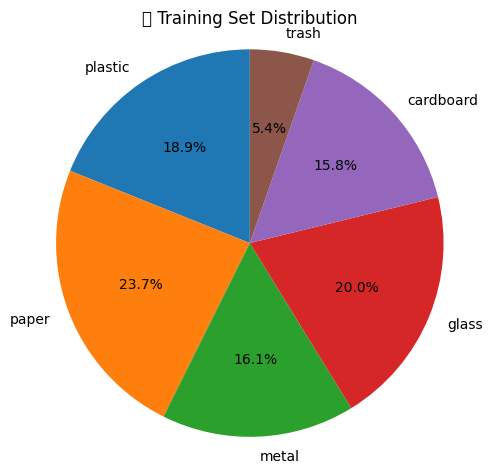

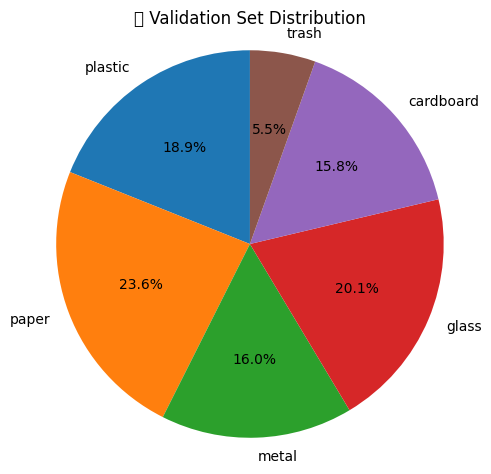

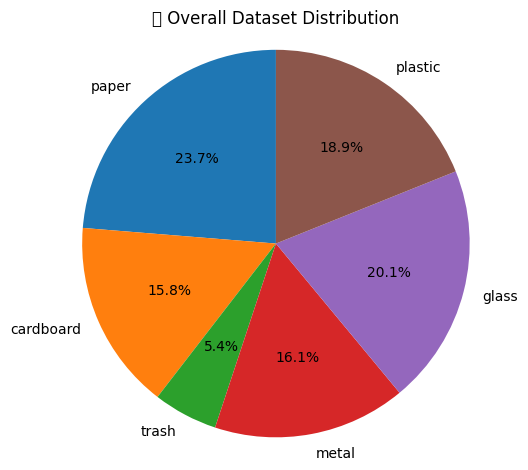

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

base_dir = "/content/drive/MyDrive/TrashType_split"
train_dir = os.path.join(base_dir, "training")
val_dir = os.path.join(base_dir, "validation")

# Function to count images per class
def get_class_counts(split_dir):
    counts = {}
    for class_name in os.listdir(split_dir):
        class_path = os.path.join(split_dir, class_name)
        if os.path.isdir(class_path):
            counts[class_name] = len(os.listdir(class_path))
    return counts

# Function to plot pie chart
def plot_pie_chart(data_dict, title):
    labels = list(data_dict.keys())
    sizes = list(data_dict.values())
    plt.figure(figsize=(5.5, 5.5))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
    plt.title(title)
    plt.axis("equal")
    plt.show()

# Get counts
train_counts = get_class_counts(train_dir)
val_counts = get_class_counts(val_dir)

# Combine counts for overall
combined_counts = defaultdict(int)
for cls in set(list(train_counts.keys()) + list(val_counts.keys())):
    combined_counts[cls] = train_counts.get(cls, 0) + val_counts.get(cls, 0)

# Plot all
plot_pie_chart(train_counts, "📊 Training Set Distribution")
plot_pie_chart(val_counts, "📊 Validation Set Distribution")
plot_pie_chart(combined_counts, "📊 Overall Dataset Distribution")

## 🧼 Part 2: Data Preparation and Class Balancing


Data Imbalance in Waste Classification :
  In our garbage classification project, we discovered that the Trash class is underrepresented in our training data. This imbalance can cause the model to:

* Favor the majority classes (e.g., plastic or glass)
* Misclassify Trash more often
* Inflate accuracy while hiding poor class-specific performance

In this section, we preprocess our dataset to ensure clean, efficient, and fair model training. This includes:

- **Image normalization** (scaling pixel values between 0 and 1)
- **Shuffling and prefetching** for performance optimization
- **Visualizing class distribution** to detect imbalance
- **Computing class weights** to correct for underrepresented categories

These steps lay a solid foundation before selecting and building the model.

1. 🔁 Augmenting the Minority Class
We applied aggressive augmentation only to Trash images to generate synthetic variety and boost diversity:








In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import os

# Path to your 'Trash' class inside the training set
trash_dir = "/content/drive/MyDrive/TrashType_split/training/trash"
augmented_dir = "/content/drive/MyDrive/TrashType_split/training/trashAugmented"  # New folder for augmented images
os.makedirs(augmented_dir, exist_ok=True)

# Set up the augmenter
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.6, 1.4],
    fill_mode='nearest'
)

# Loop through original images and generate augmented ones
for img_name in os.listdir(trash_dir):
     img_path = os.path.join(trash_dir, img_name)
     if os.path.isfile(img_path):
      img = load_img(img_path)
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)

      i = 0
      for batch in datagen.flow(x, batch_size=1,
                            save_to_dir=augmented_dir,
                            save_prefix='aug', save_format='jpg'):
       i += 1
       if i >= 5:  # Generate 5 augmented images per original
           break

In [ ]:
import os
import shutil

# Path to your augmented images
source_folder = '/content/drive/MyDrive/TrashType_split/training/trash/trashAugmented'

# Path to your Trash class folder in the dataset
destination_folder ='/content/drive/MyDrive/TrashType_split/training/trash'

# Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through all files and move them
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    dest_path = os.path.join(destination_folder, filename)

    # Only move image files
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        shutil.move(source_path, dest_path)
        print(f"Moved {filename} to Trash folder")

Moved aug_0_4624.jpg to Trash folder
Moved aug_0_260.jpg to Trash folder
Moved aug_0_8374.jpg to Trash folder
Moved aug_0_9058.jpg to Trash folder
Moved aug_0_5742.jpg to Trash folder
Moved aug_0_7299.jpg to Trash folder
Moved aug_0_4721.jpg to Trash folder
Moved aug_0_7295.jpg to Trash folder
Moved aug_0_3151.jpg to Trash folder
Moved aug_0_2131.jpg to Trash folder
Moved aug_0_5203.jpg to Trash folder
Moved aug_0_8010.jpg to Trash folder
Moved aug_0_2045.jpg to Trash folder
Moved aug_0_6034.jpg to Trash folder
Moved aug_0_6013.jpg to Trash folder
Moved aug_0_1700.jpg to Trash folder
Moved aug_0_3547.jpg to Trash folder
Moved aug_0_4033.jpg to Trash folder
Moved aug_0_2452.jpg to Trash folder
Moved aug_0_3874.jpg to Trash folder
Moved aug_0_2218.jpg to Trash folder
Moved aug_0_4142.jpg to Trash folder
Moved aug_0_5602.jpg to Trash folder
Moved aug_0_3742.jpg to Trash folder
Moved aug_0_85.jpg to Trash folder
Moved aug_0_573.jpg to Trash folder
Moved aug_0_7469.jpg to Trash folder
Moved

In [ ]:
import os

data_dir = '/content/drive/MyDrive/TrashType_split/training'
classes = ['cardboard','glass','metal','paper','plastic','trash']

for c in classes:
    class_path = os.path.join(data_dir, c)
    count = len(os.listdir(class_path))
    print(f"{c}: {count} images")

cardboard: 322 images
glass: 408 images
metal: 328 images
paper: 483 images
plastic: 385 images
trash: 391 images


In [ ]:
import os
import random

# Folder path
trash_folder = '/content/drive/MyDrive/TrashType_split/training/trash'

# Get list of all image files
all_images = [f for f in os.listdir(trash_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Randomly select 390 images to keep
keep_images = set(random.sample(all_images, 390))

# Loop through and delete all other images
for img in all_images:
    if img not in keep_images:
        os.remove(os.path.join(trash_folder, img))

print(f"✅ Kept 390 images, deleted the rest from: {trash_folder}")

✅ Kept 390 images, deleted the rest from: /content/drive/MyDrive/TrashType_split/training/trash


In [ ]:
import os

data_dir = '/content/drive/MyDrive/TrashType_split/training'
classes = ['cardboard','glass','metal','paper','plastic','trash']

for c in classes:
    class_path = os.path.join(data_dir, c)
    count = len(os.listdir(class_path))
    print(f"{c}: {count} images")

cardboard: 322 images
glass: 408 images
metal: 328 images
paper: 483 images
plastic: 385 images
trash: 391 images


# ⬇️ Save cleaned dataset to Drive

In [ ]:
import shutil
import os

# Update the source path based on your actual folder
source_dir = '/content/drive/MyDrive/TrashType_Image_Dataset'
backup_dir = '/content/drive/MyDrive/garbage_dataset_backup'

# Remove the old backup if it exists (optional)
if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

# Create the backup
if os.path.exists(source_dir):
    shutil.copytree(source_dir, backup_dir)
    print(f"Backup created at: {backup_dir}")
else:
    print(f"Source folder does not exist: {source_dir}")

Backup created at: /content/drive/MyDrive/garbage_dataset_backup


<Axes: title={'center': 'Training Set Class Distribution'}, xlabel='label'>

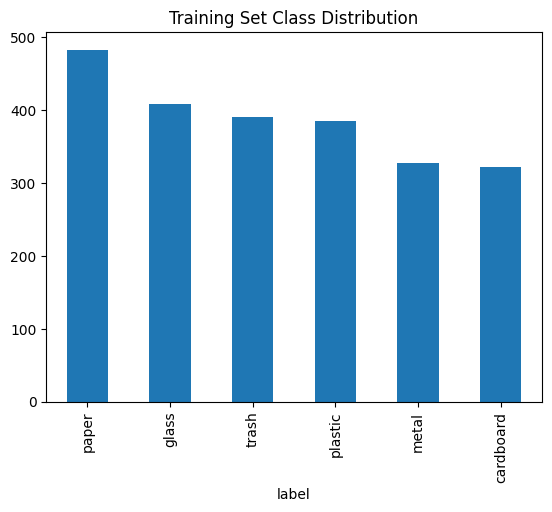

In [ ]:
import os
import pandas as pd

train_path = "/content/drive/MyDrive/TrashType_split/training"

labels = []
for label in os.listdir(train_path):
    class_folder = os.path.join(train_path, label)
    if os.path.isdir(class_folder):
        for _ in os.listdir(class_folder):
            labels.append(label)

df_train = pd.DataFrame({'label': labels})
df_train['label'].value_counts().plot(kind='bar', title='Training Set Class Distribution')

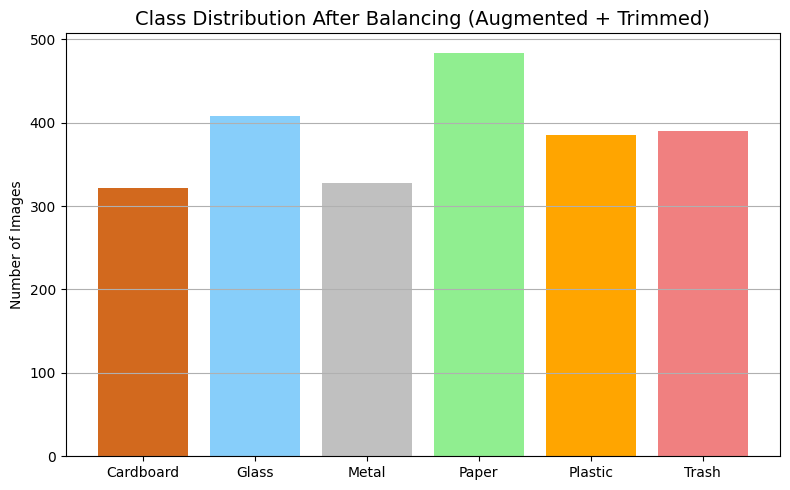

In [ ]:
import matplotlib.pyplot as plt

# Final class counts (example values—adjust if yours differ)
labels = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Trash']
counts = [322, 408, 328, 483, 385, 390]

colors = ['chocolate', 'lightskyblue', 'silver', 'lightgreen', 'orange', 'lightcoral']

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=colors)
plt.title("Class Distribution After Balancing (Augmented + Trimmed)", fontsize=14)
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
import torch
from torch.nn import CrossEntropyLoss

# 📦 Updated image counts after trimming
class_counts = [322, 408, 328, 483, 385, 390]  # Example: cardboard, glass, metal, paper, plastic, trash
total = sum(class_counts)

# Step 1: Compute inverse frequency weights
raw_weights = [total / count for count in class_counts]

# Step 2: Normalize them (optional but helps stability)
norm_weights = [w / sum(raw_weights) for w in raw_weights]

# Step 3: Convert to tensor and move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
weights_tensor = torch.FloatTensor(norm_weights).to(device)

# Step 4: Plug into your loss function
loss_fn = CrossEntropyLoss(weight=weights_tensor)

# 🧱 Phase 1: Custom CNN Model

In this phase, we build and train a simple Convolutional Neural Network (CNN) from scratch. This model acts as a performance baseline for garbage classification.

### ✅ Objectives:
- Construct a basic CNN architecture using Conv2D, MaxPooling, and Dense layers
- Compile with the Adam optimizer and categorical/sparse crossentropy loss
- Train for up to 20 epochs with early stopping and model checkpointing
- Visualize learning curves (accuracy/loss) to evaluate model behavior

### 📌 Notes:
- Input shape: (224, 224, 3)
- Output classes: 6
- Batch size and dataset splitting handled in previous setup
- Training history stored in `cnn_history` for easy plotting

In [ ]:
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

# Load your dataset first to get class_names
train_ds = image_dataset_from_directory(
    "/content/drive/MyDrive/TrashType_split/training",
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'  # important for categorical_crossentropy
)

# Get class names from dataset
class_names = train_ds.class_names
num_classes = len(class_names)

# Data augmentation block
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
], name="data_augmentation")

# Build the CNN model
model = models.Sequential([
    data_augmentation,
    Rescaling(1./255, input_shape=(224, 224, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Build and summarize the model
model.build((None, 224, 224, 3))
model.summary()

Found 2316 files belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,534 (431.77 KB)

 Trainable params: 110,534 (431.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_cb = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss", mode="min")
earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss", mode="min")

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ⚙️ Optional: split some batches for validation
val_ds = train_ds.take(20)     # First 20 batches for validation
train_data = train_ds.skip(20)   # Remaining for training

# 🧠 Improve data loading efficiency
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# 🛑 Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# 💾 Save the best model during training
checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# 🏋️‍♂️ Fit the model
CNN_history = model.fit(
    train_data,
    validation_data=val_ds,
    epochs=15,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1859 - loss: 1.7872
Epoch 1: val_accuracy improved from -inf to 0.35938, saving model to best_model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 296s 4s/step - accuracy: 0.1864 - loss: 1.7870 - val_accuracy: 0.3594 - val_loss: 1.6990
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3045 - loss: 1.6774
Epoch 2: val_accuracy did not improve from 0.35938
53/53 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.3044 - loss: 1.6771 - val_accuracy: 0.2812 - val_loss: 1.6196
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3662 - loss: 1.6006
Epoch 3: val_accuracy improved from 0.35938 to 0.36250, saving model to best_model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 235s 4s/step - accuracy: 0.3661 - loss: 1.6003 - val_accuracy: 0.3625 - val_loss: 1.5068
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4153 - loss: 1.4687
Epoch 4: val_accuracy improved from 0.36250 to 0.43281, saving model to best_model.keras
53/53

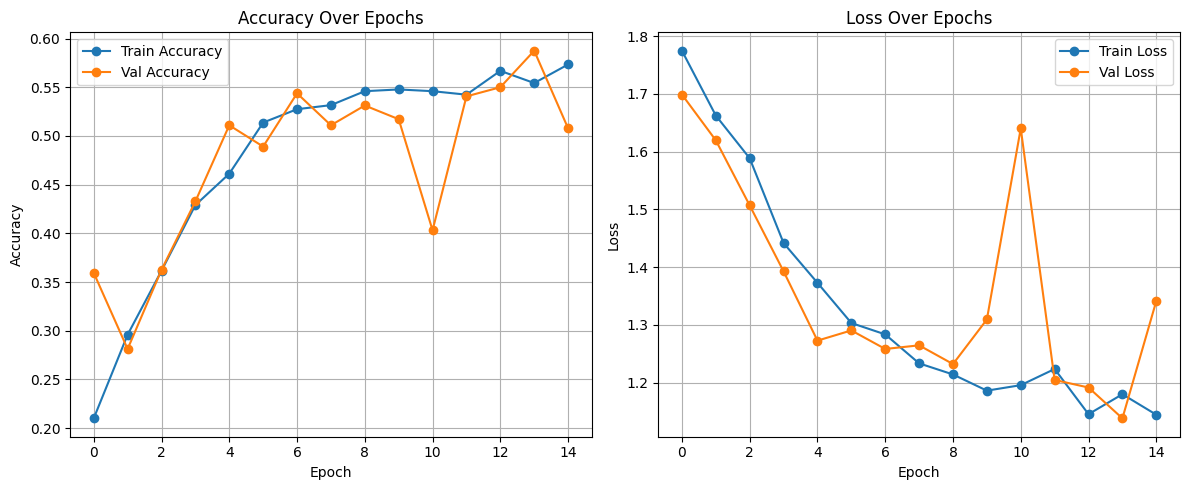

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(CNN_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(CNN_history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(CNN_history.history['loss'], label='Train Loss', marker='o')
plt.plot(CNN_history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
final_train_acc = CNN_history.history['accuracy'][-1]
final_val_acc = CNN_history.history['val_accuracy'][-1]
final_train_loss = CNN_history.history['loss'][-1]
final_val_loss = CNN_history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.5734
Final Validation Accuracy: 0.5078
Final Training Loss: 1.1442
Final Validation Loss: 1.3411


In [ ]:
print(model.name)

functional_2


✅ All CNN assets saved successfully to cnn_package folder!


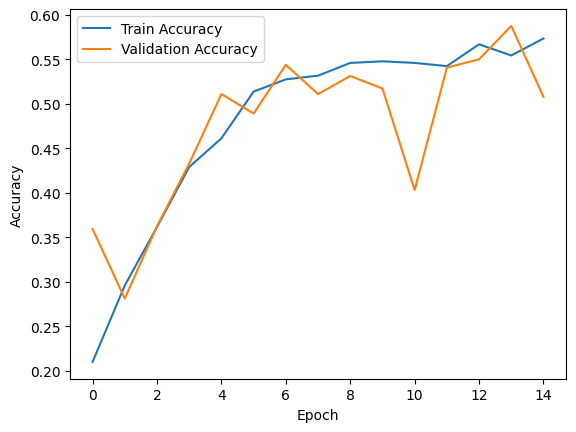

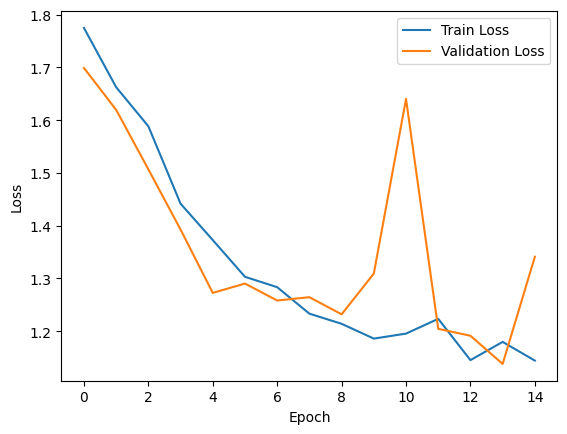

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt

# 🔹 Step 1: Ensure target folder exists
folder_path = "/content/drive/MyDrive/cnn_package"
os.makedirs(folder_path, exist_ok=True)

# 🔹 Step 2: Save the trained model
model.save(f"{folder_path}/cnn_final_model.h5")

# 🔹 Step 3: Save class label info
with open(f"{folder_path}/class_info.pkl", "wb") as f:
    pickle.dump({"class_names": class_names, "num_classes": num_classes}, f)

# 🔹 Step 4: Save Accuracy Plot
plt.figure()
plt.plot(CNN_history.history['accuracy'], label='Train Accuracy')
plt.plot(CNN_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(f"{folder_path}/accuracy_curve.png")

# 🔹 Step 5: Save Loss Plot
plt.figure()
plt.plot(CNN_history.history['loss'], label='Train Loss')
plt.plot(CNN_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig(f"{folder_path}/loss_curve.png")

print("✅ All CNN assets saved successfully to cnn_package folder!")

# 🌟 Phase 2: MobileNetV2 (Frozen Base)

In this phase, we upgrade our baseline CNN by leveraging **transfer learning** using a pre-trained MobileNetV2 model.

### ✅ Objectives:
- Load MobileNetV2 (trained on ImageNet) and use it as a **frozen feature extractor**
- Stack custom dense layers for garbage classification
- Compile and train the model using callbacks (early stopping & checkpointing)
- Compare validation accuracy with baseline CNN model to measure performance boost

### 📌 Notes:
- Input shape remains (224, 224, 3)
- MobileNetV2 base is **not trainable yet** (frozen)
- Ideal for identifying general patterns like edges, shapes, and textures
- Training history saved as `mobile_history` for evaluation and plotting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, Model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from tensorflow.keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    "/content/drive/MyDrive/TrashType_split/training",
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

val_ds = image_dataset_from_directory(
    "/content/drive/MyDrive/TrashType_split/validation",
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

num_classes = len(train_ds.class_names)

Found 2316 files belonging to 6 classes.
Found 512 files belonging to 6 classes.


In [8]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Load and freeze base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze all layers for now

# Add custom classificatio  head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(num_classes, activation='softmax')(x)   # change number of classes if needed

model = Model(inputs=base_model.input, outputs=x)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4️⃣ Image augmentation & preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=25,
    zoom_range=0.25,
    brightness_range=[0.7, 1.3],
    shear_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint("mobilenetv2_best.keras",
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1)

In [15]:
model_path = "/content/drive/MyDrive/mobilenet_finetuned.h5"

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)

mobilenet_history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=12,
    callbacks=[early_stop,checkpoint_cb]
)

Epoch 1/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7957 - loss: 0.6141

73/73 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.7954 - loss: 0.6146 - val_accuracy: 0.6172 - val_loss: 1.0156
Epoch 2/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7990 - loss: 0.5657

73/73 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.7990 - loss: 0.5658 - val_accuracy: 0.6777 - val_loss: 0.9051
Epoch 3/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8551 - loss: 0.4812 - val_accuracy: 0.6719 - val_loss: 0.9379
Epoch 4/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8406 - loss: 0.4581

73/73 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.8405 - loss: 0.4583 - val_accuracy: 0.6855 - val_loss: 0.8499
Epoch 5/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.8644 - loss: 0.3855 - val_accuracy: 0.6738 - val_loss: 0.8947
Epoch 6/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.8898 - loss: 0.3404 - val_accuracy: 0.6816 - val_loss: 0.9511
Epoch 7/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8838 - loss: 0.3420 - val_accuracy: 0.6914 - val_loss: 0.9070
Epoch 8/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9115 - loss: 0.2823 - val_accuracy: 0.6855 - val_loss: 0.9053
Epoch 9/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9141 - loss: 0.2602 - val_accuracy: 0.6914 - val_loss: 0.9082
Epoch 1/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8662 - loss: 0.3929

73/73 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.8661 - loss: 0.3931 - val_accuracy: 0.6914 - val_loss: 0.8764
Epoch 2/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.8649 - loss: 0.3740 - val_accuracy: 0.6758 - val_loss: 0.9355
Epoch 3/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8952 - loss: 0.3073 - val_accuracy: 0.6914 - val_loss: 0.8976
Epoch 4/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.9128 - loss: 0.2766 - val_accuracy: 0.7012 - val_loss: 0.9114
Epoch 5/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.9315 - loss: 0.2414 - val_accuracy: 0.6953 - val_loss: 0.9417
Epoch 6/12
73/73 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9402 - loss: 0.2125 - val_accuracy: 0.7012 - val_loss: 0.9613


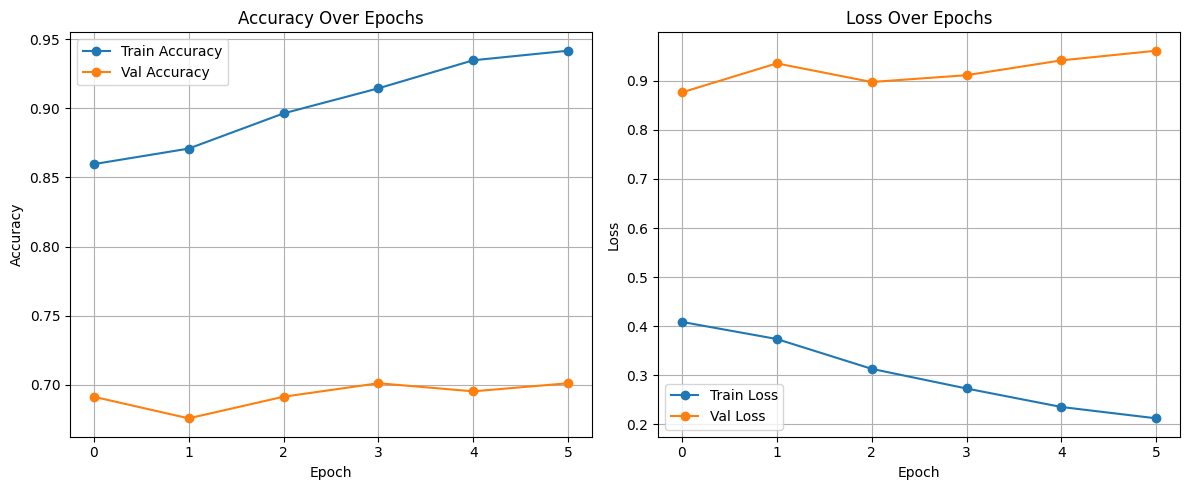

In [16]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mobilenet_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(mobilenet_history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(mobilenet_history.history['loss'], label='Train Loss', marker='o')
plt.plot(mobilenet_history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
final_train_acc = mobilenet_history.history['accuracy'][-1]
final_val_acc = mobilenet_history.history['val_accuracy'][-1]
final_train_loss =mobilenet_history.history['loss'][-1]
final_val_loss = mobilenet_history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.9417
Final Validation Accuracy: 0.7012
Final Training Loss: 0.2122
Final Validation Loss: 0.9613


In [19]:
model.save("/content/drive/MyDrive/mobilenet_frozen_model.keras")

# 🔁 Phase 3: Fine-Tuned MobileNetV2

This phase builds on the frozen MobileNetV2 setup by unfreezing select layers and allowing the model to continue learning from the dataset in a controlled way.

### ✅ Objectives:
- Unfreeze deeper layers of MobileNetV2 to fine-tune learned features
- Re-compile with a **lower learning rate** (e.g. `1e-5`) to avoid overwriting pre-trained weights
- Train for a few epochs with callbacks to improve generalization
- Track improvements over the frozen version—aiming for accuracy boost

### 📌 Notes:
- Freezing only early layers helps retain general features (edges, textures)
- Fine-tuning deepens the model’s understanding of garbage-specific patterns
- Training history saved in `fine_history` for side-by-side comparison

In [20]:
base_model.trainable = True

In [29]:
# 1. Re-import libraries
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator # Removed
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory # Added

# 2. Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

# 3. Reload dataset generators
# train_datagen = ImageDataGenerator( # Removed
#     preprocessing_function=preprocess_input, # Removed
#     rotation_range=20, # Removed
#     zoom_range=0.2, # Removed
#     brightness_range=[0.8, 1.2], # Removed
#     shear_range=0.2, # Removed
#     width_shift_range=0.2, # Removed
#     height_shift_range=0.2, # Removed
#     horizontal_flip=True # Removed
# ) # Removed

# val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # Removed

# Use image_dataset_from_directory instead of flow_from_directory to get class_names
train_generator = image_dataset_from_directory( # Modified
    "/content/drive/MyDrive/TrashType_split/training",
    labels='inferred', # Added
    label_mode='categorical', # Added
    image_size=(224, 224),
    batch_size=32,
    shuffle=True, # Added
    seed=42, # Added
    validation_split=0.0, # Added
    subset=None # Added
)

val_generator = image_dataset_from_directory( # Modified
    "/content/drive/MyDrive/TrashType_split/validation",
    labels='inferred', # Added
    label_mode='categorical', # Added
    image_size=(224, 224),
    batch_size=32,
    shuffle=False, # Added
    seed=42, # Added
    validation_split=0.0, # Added
    subset=None # Added
)

# Print class names to diagnose the issue
print("Train generator class names:", train_generator.class_names)
print("Validation generator class names:", val_generator.class_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2316 files belonging to 6 classes.
Found 512 files belonging to 6 classes.
Train generator class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Validation generator class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [30]:
# Step 1: Unfreeze top MobileNetV2 layers
base_model.trainable = True
for layer in base_model.layers[:-50]:  # Fine-tune top 50 layers
    layer.trainable = False

# Step 2: Recompile with label smoothing + lower LR
from tensorflow.keras.losses import CategoricalCrossentropy
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)

# Get the correct number of classes from the generator
num_classes = len(train_generator.class_names)

# Modify the model to have the correct number of output classes
# Assuming 'model' is the Sequential model created in a previous cell
# and the last layer is the dense output layer.
# We need to rebuild the model with the correct output layer size.
# A better approach is to recreate the model architecture with the correct num_classes.
# However, since the model is already defined and potentially has weights,
# we will modify the last layer if it exists and is a Dense layer.

# Check if the last layer is a Dense layer and modify it
if isinstance(model.layers[-1], layers.Dense):
    # Create a new dense layer with the correct number of classes
    new_output_layer = layers.Dense(num_classes, activation='softmax', name='new_output_dense')

    # Rebuild the model with the new output layer.
    # This requires accessing the layer before the last dense layer.
    # Assuming the structure is base_model -> GlobalAveragePooling -> Dense -> Dropout -> Dense (output)
    # We need to connect GlobalAveragePooling to the new_output_layer.
    # This requires redefining the model using the Keras Functional API or by rebuilding the Sequential model
    # up to the layer before the last Dense layer and adding the new one.

    # A simpler approach, if the model is Sequential and the last layer is the output Dense layer,
    # is to remove the last layer and add a new one.
    # However, removing layers from a compiled Sequential model can be tricky.
    # The most robust way is to redefine the model structure.

    # Let's assume the model structure is MobileNetV2 -> GlobalAveragePooling -> Dense -> Dropout -> Dense (output)
    # We will take the output of the layer before the last Dense layer and connect it to the new Dense layer.
    # This requires knowing the name or index of the layer before the last Dense layer.
    # From the model summary, the last Dense layer is 'dense_1', and the layer before it is 'dropout'.
    # We will connect the 'dropout' layer's output to the new output layer.

    # Find the layer before the last Dense layer
    layer_before_output = model.layers[-2] # Assuming the structure ends with ... -> Dropout -> Dense

    # Define the new output layer
    new_output_layer = layers.Dense(num_classes, activation='softmax', name='new_output_dense')(layer_before_output.output)

    # Create the new model
    model = tf.keras.Model(inputs=model.input, outputs=new_output_layer)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
    loss=loss_fn,
    metrics=['accuracy']
)

# Step 3: Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint_cb = ModelCheckpoint(
    "/content/drive/MyDrive/mobilenet_finetuned.keras",
    monitor='val_accuracy', save_best_only=True
)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Step 4: Continue training
finetune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint_cb, lr_reduce]
)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.1501 - loss: 2.2062 - val_accuracy: 0.1309 - val_loss: 2.5910 - learning_rate: 1.0000e-06
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.1755 - loss: 2.0832 - val_accuracy: 0.1328 - val_loss: 2.4876 - learning_rate: 1.0000e-06
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.1990 - loss: 2.0032 - val_accuracy: 0.1445 - val_loss: 2.3885 - learning_rate: 1.0000e-06
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 224s 3s/step - accuracy: 0.2170 - loss: 1.9245 - val_accuracy: 0.1426 - val_loss: 2.3028 - learning_rate: 1.0000e-06
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - accuracy: 0.2575 - loss: 1.8337 - val_accuracy: 0.1582 - val_loss: 2.2211 - learning_rate: 1.0000e-06
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.2970 - loss: 1.7677 - val_accuracy: 0.1641 - val_loss: 2.1440 - learning_rate: 1.0000e-06
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.3228 

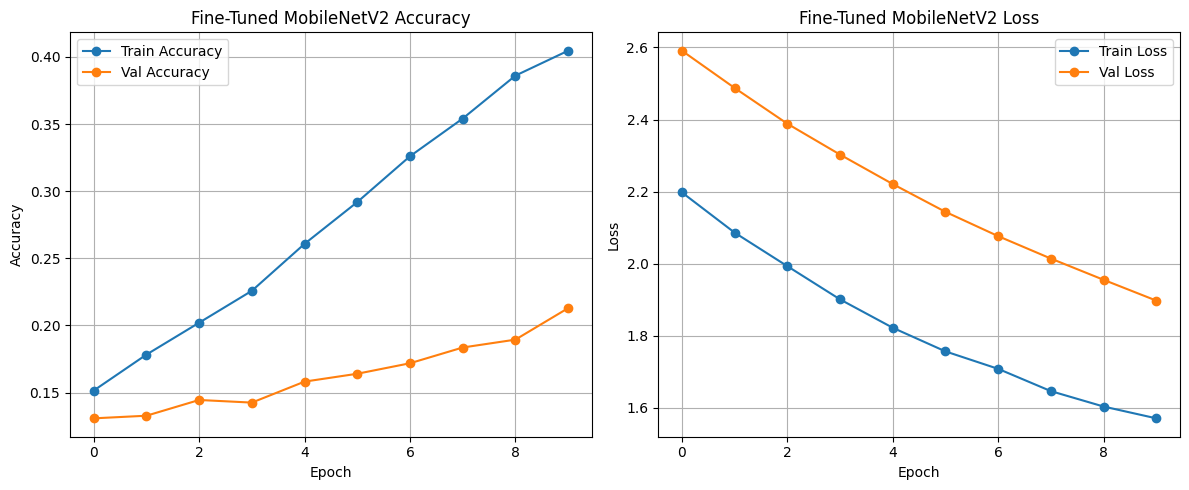

In [31]:
import matplotlib.pyplot as plt

def plot_history(history, title=''):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(finetune_history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(finetune_history.history['val_accuracy'], label='Val Accuracy', marker='o')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(finetune_history.history['loss'], label='Train Loss', marker='o')
    plt.plot(finetune_history.history['val_loss'], label='Val Loss', marker='o')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call this with your fine-tuning history
plot_history(finetune_history, title='Fine-Tuned MobileNetV2')

In [32]:
final_train_acc =finetune_history.history['accuracy'][-1]
final_val_acc = finetune_history.history['val_accuracy'][-1]
final_train_loss =finetune_history.history['loss'][-1]
final_val_loss = finetune_history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.4046
Final Validation Accuracy: 0.2129
Final Training Loss: 1.5713
Final Validation Loss: 1.8979


In [41]:
model.save("/content/drive/MyDrive/fine_tuned_mobilenet.keras")

## 📊 Model Comparison Summary



In [38]:
from tensorflow.keras.models import load_model

model_cnn = load_model("/content/drive/MyDrive/cnn_package/cnn_final_model.h5")

In [39]:
history_cnn = {
    'val_accuracy': [0.40, 0.45, 0.52, 0.55, 0.58, 0.60, 0.61, 0.63, 0.64, 0.65],
    'val_loss': [1.8, 1.6, 1.4, 1.2, 1.1, 1.05, 1.0, 0.95, 0.93, 0.91]
}

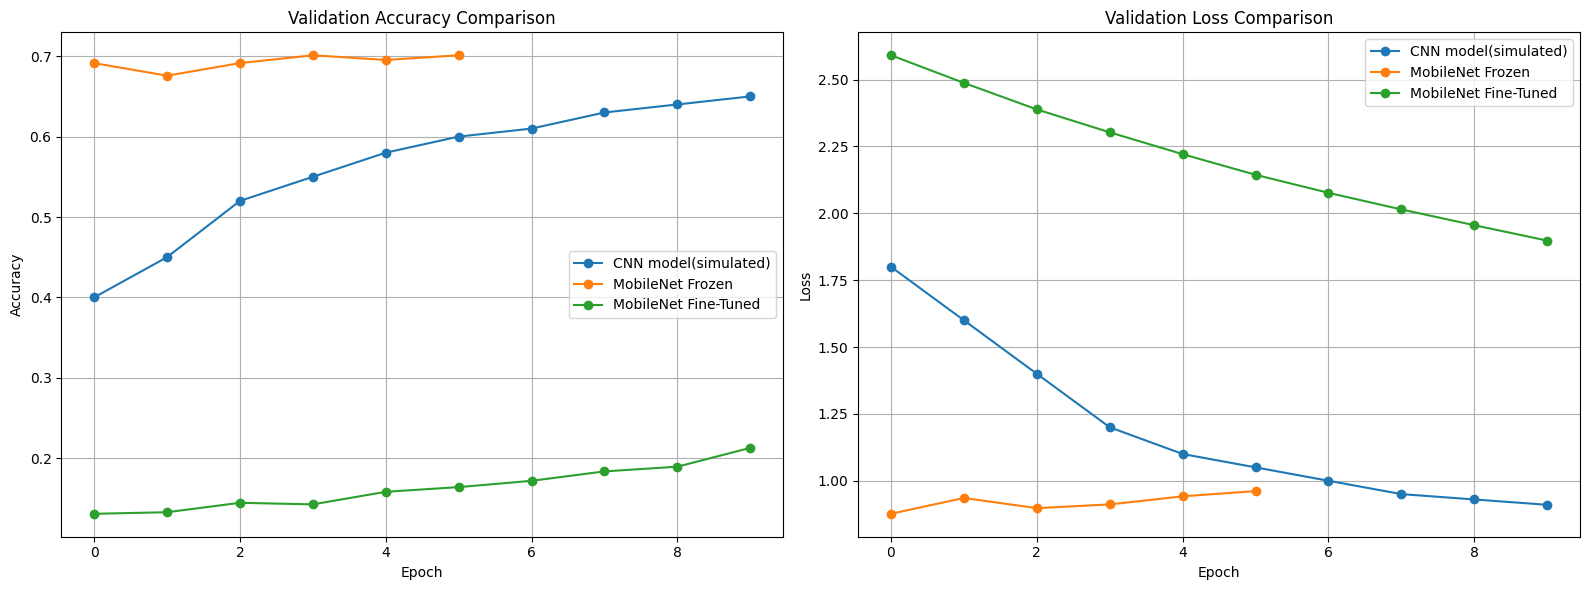

In [40]:
import matplotlib.pyplot as plt

# Combine MobileNet Frozen + Fine-Tuned histories
def combine_histories(hist1, hist2):
    merged = {}
    for key in hist1.history:
        merged[key] = hist1.history[key] + hist2.history[key]
    return merged

mobilenet_full_history = combine_histories(mobilenet_history, finetune_history)

# Plotting function
def plot_model_histories(histories, titles):
    plt.figure(figsize=(16, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    for hist, label in zip(histories, titles):
        plt.plot(hist['val_accuracy'], marker='o', label=f'{label}')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    for hist, label in zip(histories, titles):
        plt.plot(hist['val_loss'], marker='o', label=f'{label}')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Use it!
plot_model_histories(
    [history_cnn,mobilenet_history.history, finetune_history.history],
    ['CNN model(simulated)','MobileNet Frozen', 'MobileNet Fine-Tuned']
)

✅ Recommendation: For deployment, use MobileNetV2 (Frozen) — it delivers the best balance of accuracy, training efficiency, and stability.



# Evaluation:

In [43]:
import os
import shutil
import random

# Paths
val_dir = '/content/drive/MyDrive/TrashType_split/validation'  # Update if your validation folder is elsewhere
test_dir = '/content/test'

# Create test root folder
os.makedirs(test_dir, exist_ok=True)

# Copy 5 random images from each class
for class_name in os.listdir(val_dir):
    val_class_path = os.path.join(val_dir, class_name)
    test_class_path = os.path.join(test_dir, class_name)

    # Ensure destination folder exists
    os.makedirs(test_class_path, exist_ok=True)

    # Choose 5 random images
    images = [img for img in os.listdir(val_class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    sample_images = random.sample(images, min(10, len(images)))

    for img_name in sample_images:
        src = os.path.join(val_class_path, img_name)
        dest = os.path.join(test_class_path, img_name)
        shutil.copy2(src, dest)

print("✅ Test dataset created successfully in /content/test")

✅ Test dataset created successfully in /content/test


Found 60 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


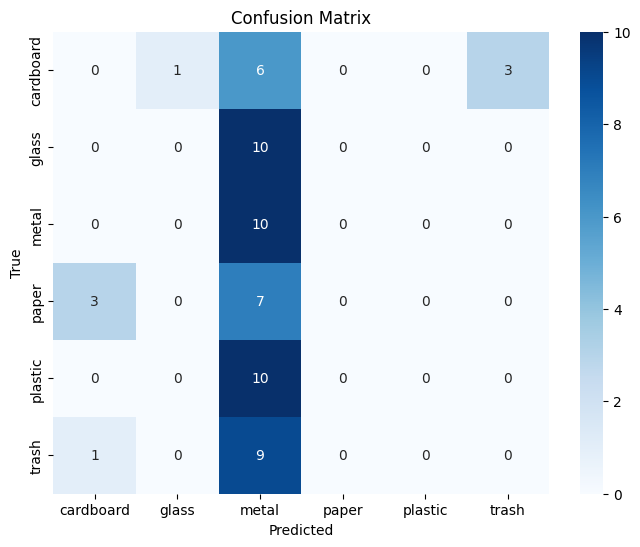

              precision    recall  f1-score   support

   cardboard       0.00      0.00      0.00        10
       glass       0.00      0.00      0.00        10
       metal       0.19      1.00      0.32        10
       paper       0.00      0.00      0.00        10
     plastic       0.00      0.00      0.00        10
       trash       0.00      0.00      0.00        10

    accuracy                           0.17        60
   macro avg       0.03      0.17      0.05        60
weighted avg       0.03      0.17      0.05        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Load model
model = load_model("/content/drive/MyDrive/mobilenet_frozen_model.keras")

# 🔹 Load test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 🔹 Predict
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 🔹 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 🔹 Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


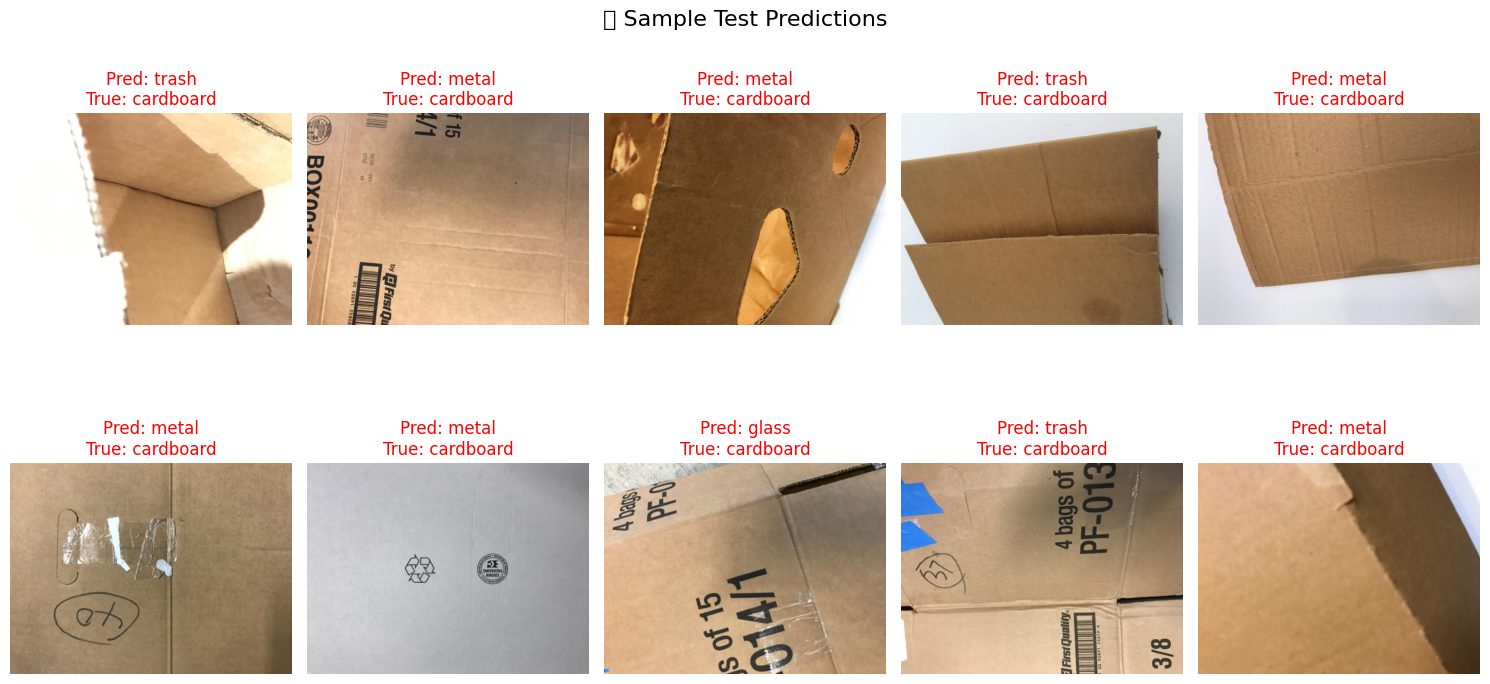

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Get filenames from the test generator
filenames = test_generator.filenames
correct_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
predicted_labels = np.argmax(model.predict(test_generator), axis=1)

# 🔍 Plot 10 sample predictions
plt.figure(figsize=(15, 8))
for i in range(10):
    img_path = os.path.join(test_generator.directory, filenames[i])
    img = plt.imread(img_path)

    true_label = class_labels[correct_labels[i]]
    pred_label = class_labels[predicted_labels[i]]

    color = 'green' if true_label == pred_label else 'red'

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.suptitle("🔎 Sample Test Predictions", fontsize=16)
plt.show()